# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [123]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# so charts appear in the notebook
sns.set()
%matplotlib inline


# Load the csv file into a pandas dataframe.


In [124]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('./data/cars.csv')



# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [125]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [126]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

In [127]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [128]:
# * Which column has the most null values and how many null values does it have?
print('{0}: {1}'.format(df.count().idxmin(), df.isna().sum().max()))

Engine HP: 69


In [129]:
# * Print how long (aka how many rows) our dataframe is.
len(df)

11194

In [130]:
# * Remove any row that has a null value in it. 
df = df.dropna()
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [131]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
len(df)

11092

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

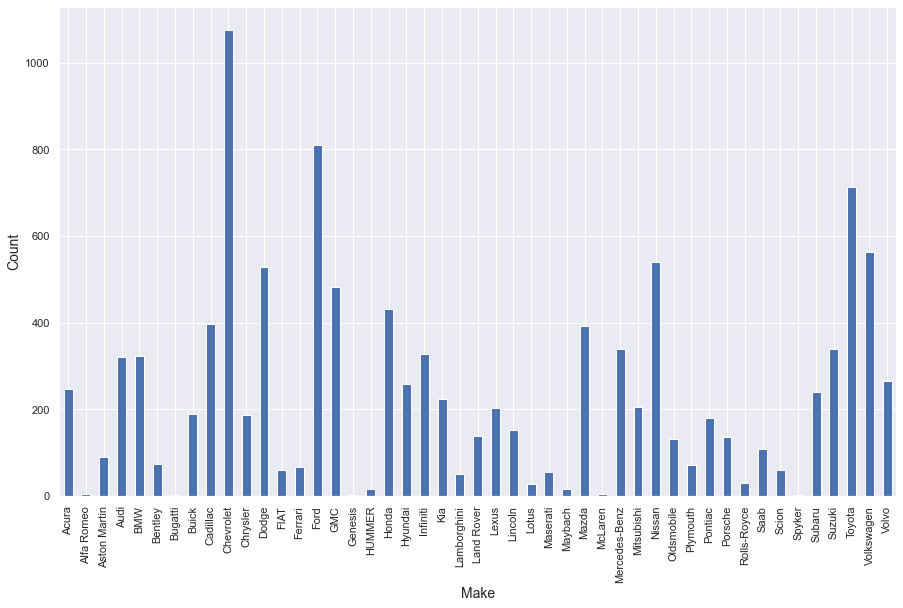

In [132]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
plt.figure(figsize=[15, 9])
gb = df.groupby('Make')['Make'].count()
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
gb.plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

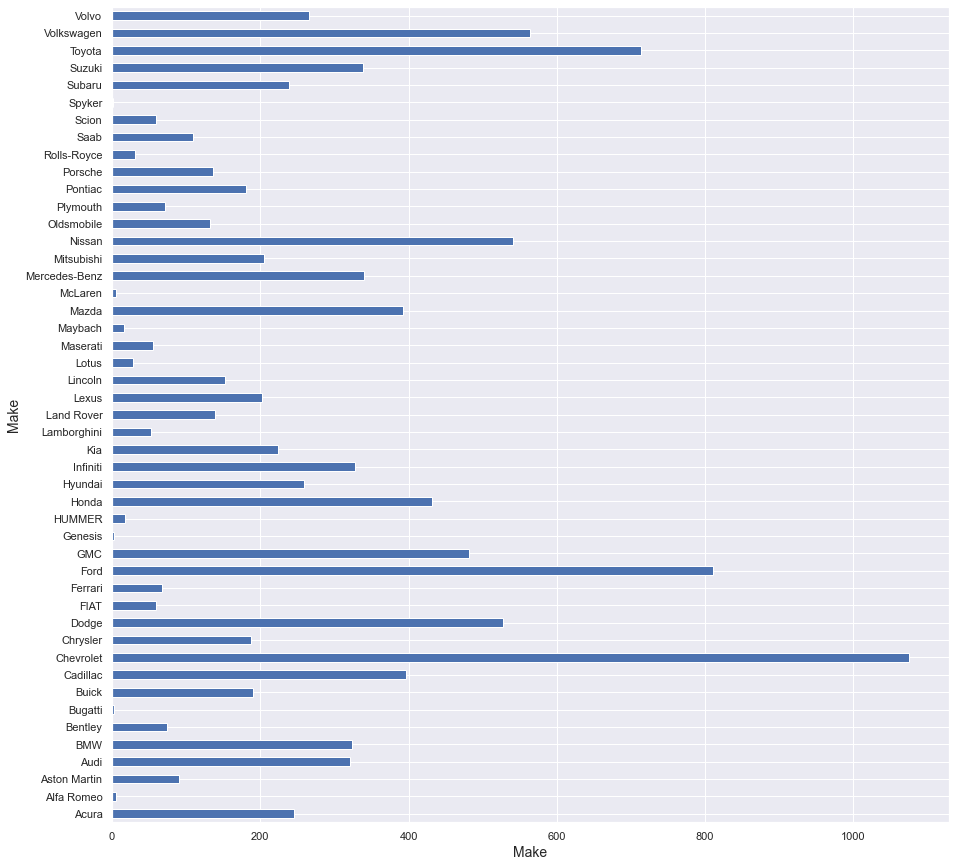

In [133]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
plt.figure(figsize=[15, 15])
gb = df.groupby('Make')['Make'].count()
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
gb.plot(kind='barh')


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


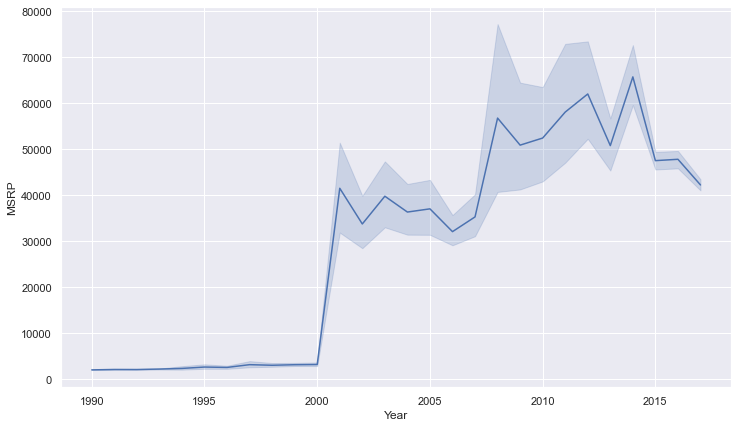

In [134]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(x = "Year", y = "MSRP", ax=ax, data=df)

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [135]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
condition = df['Year'] < 2000
df['adjusted_price'] = np.where(condition, df['MSRP']*10, df['MSRP'])
df.head(25)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200,37200


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

[(0.0, 100000.0)]

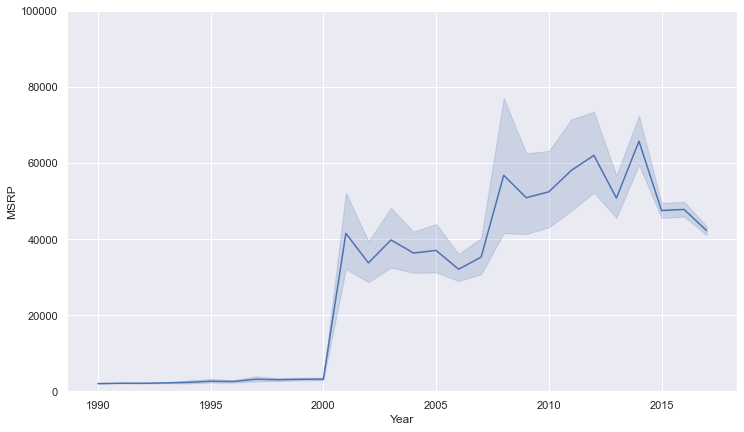

In [136]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
fig, ax = plt.subplots(figsize=(12,7))
new_plot = sns.lineplot(x = "Year", y = "MSRP", ax=ax, data=df)
new_plot.set(ylim=(0,100000))


# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [137]:
# What are the top 5 car makers make the most expensive cars on average. 
mean = df.groupby('Make')['MSRP'].mean()
mean = mean.round(2)
mean = mean.sort_values(ascending=False)
mean[:5]

Make
Bugatti        1757223.67
Maybach         546221.88
Rolls-Royce     351130.65
Lamborghini     331567.31
Bentley         247169.32
Name: MSRP, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [138]:
# Which car makers have the highest median highway MPG?
median = df.groupby('Make')['highway MPG'].median()
median = median.sort_values(ascending=False)
median[:5]



Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


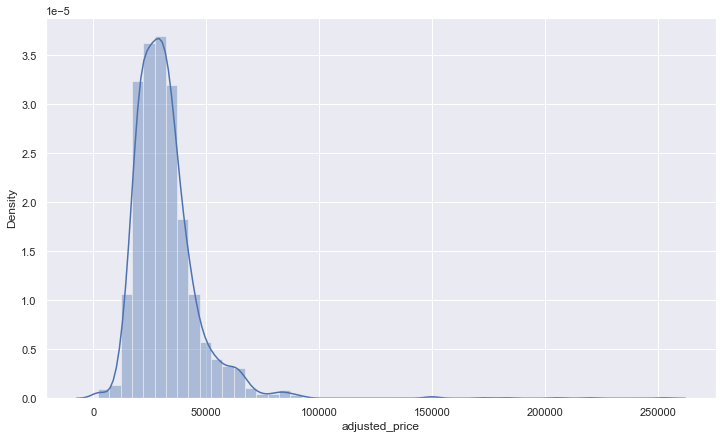

In [139]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
fig, ax = plt.subplots(figsize=(12,7))
makers = ['Chevrolet', 'Ford', 'Toyota']
condition = df["Make"].isin(makers)
sns.distplot(df[condition]['adjusted_price'])



# Remake the same histogram, but limit the x-axis from 0 to 100,000

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 100000.0)]

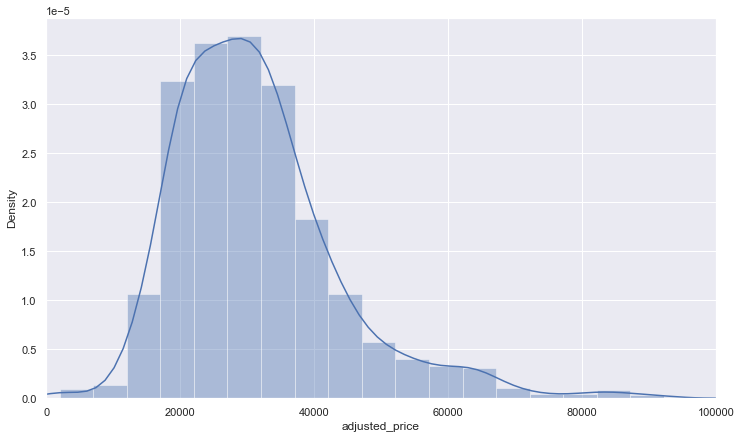

In [140]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
fig, ax = plt.subplots(figsize=(12,7))
makers = ['Chevrolet', 'Ford', 'Toyota']
condition = df["Make"].isin(makers)
new_plot = sns.distplot(df[condition]['adjusted_price'])
new_plot.set(xlim=(0,100000))


# Plot the relationship between Engine HP and highway MPG

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


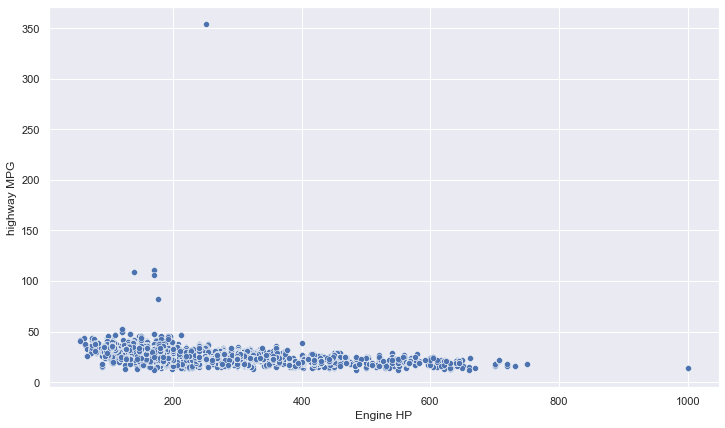

In [141]:
# Plot the relationship between Engine HP and highway MPG
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot('Engine HP', 'highway MPG', data = df)


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


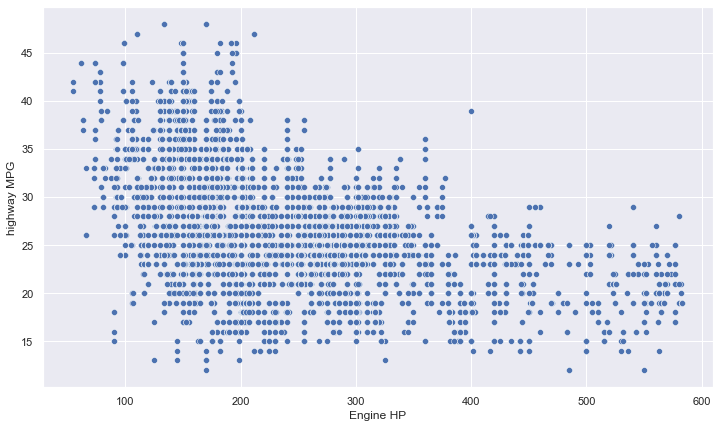

In [142]:
# Remove any statisical outliers from Engine HP and highway MPG
fig, ax = plt.subplots(figsize=(12,7))
df['Engine HP_zscore'] = abs(stats.zscore(df['Engine HP']))
df['highway MPG_zscore'] = abs(stats.zscore(df['highway MPG']))
c1 = df['Engine HP_zscore'] < 3
c2 = df['highway MPG_zscore'] < 3
df1 = df[(c1)&(c2)]
sns.scatterplot('Engine HP', 'highway MPG', data = df1)



# What does this plot tell you about how Engine HP affects highway MPG?

In [143]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('The higher the Engine MP the lower highway MPG you get')

The higher the Engine MP the lower highway MPG you get


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [ ]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)

In [ ]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('City MPG vs Highway MPG')


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

In [ ]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),ax = ax)


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [ ]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
columns = []
for column in df.columns:
    column_name = column.replace(" ", "_").lower() 
    columns.append(column_name) 
    
df.columns = columns 
df.head()

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(16,7))
c1 = df["make"]== "Ford"
c2 = df["make"]== "Toyota"
sns.distplot(df[c1]["adjusted_price"], ax = axes[0])
sns.distplot(df[c2]["adjusted_price"], ax = axes[1])